In [1]:
import sys
sys.path.append("../")
from utils import load_cnf, cnf_to_bqm
from embedding_utils import *
import seaborn as sns
from redundancy import *
from utils import *
from dwave.embedding.chain_strength import scaled
import pandas as pd
from brute_force import get_bqm_random_sat
import numpy as np
import matplotlib.pyplot as plt
from statistics import variance

In [2]:
operators = ["add", "and", "div", "eq", "ite", "mul", "not", "rem", "sub", "ult"]
def get_vertices_degrees(bqm):
    answer = []
    for (node, neighbours) in bqm.adj.items():
        answer.append(len(neighbours)) 
    return answer

In [3]:
def add_statistics(vars_arr, avg_conn_arr, variances_conn_arr, max_conn_arr, bqm):
    vertices_degrees = get_vertices_degrees(bqm)
    avg_degrees = float(sum(vertices_degrees))/float(len(vertices_degrees))
    variance_degrees = variance(vertices_degrees)
    
    vars_arr.append(len(bqm.variables))
    avg_conn_arr.append(round(avg_degrees, 2))
    variances_conn_arr.append(round(variance_degrees, 2))
    max_conn_arr.append(max(vertices_degrees))
    

In [4]:
operators_names = []

cnf_vars8 = []
cnf_vars64 = []

cnf_clauses8 = []
cnf_clauses64 = []

clauses_to_var8 = []
clauses_to_var64 = []

qubo_variables_8bit = []
qubo_variables_64bit = []

avg_qubo_conn_8bit = []
avg_qubo_conn_64bit = []

variances_conn_8bit = []
variances_conn_64bit = []

max_conn_8bit = []
max_conn_64bit = []


for operator in operators:  
    operators_names.append(operator)
    # build QUBO
    # 8 bit input
    bqm, estimated_num_variables = unicorn_file_parser(f"./operators/{operator}.unicorn")
    add_statistics(qubo_variables_8bit, avg_qubo_conn_8bit, variances_conn_8bit, max_conn_8bit, bqm)
    
    # 64 bit input
    bqm, estimated_num_variables = unicorn_file_parser(f"./operators/64_{operator}.unicorn")
    add_statistics(qubo_variables_64bit, avg_qubo_conn_64bit, variances_conn_64bit, max_conn_64bit, bqm)
    
    
    # CNF parsing
    # 8 bit
    num_variables, num_clauses, variables, clauses = load_cnf(f"./operators/{operator}.cnf")
    cnf_vars8.append(num_variables)
    cnf_clauses8.append(num_clauses)
    clauses_to_var8.append(round(float(num_clauses)/float(num_variables),2))
    
    num_variables, num_clauses, variables, clauses = load_cnf(f"./operators/64_{operator}.cnf")
    cnf_vars64.append(num_variables)
    cnf_clauses64.append(num_clauses)
    clauses_to_var64.append(round(float(num_clauses)/float(num_variables),2))
        

In [5]:
df = pd.DataFrame({
    'operator': operators_names,
    'cnf_vars8': cnf_vars8,
    'cnf_vars64': cnf_vars64,
    'clauses8': cnf_clauses8,
    'clauses64': cnf_clauses64,
    'clauses_to_var8': clauses_to_var8,
    'clauses_to_var64': clauses_to_var64,
    
    'vars8': qubo_variables_8bit,
    'vars64': qubo_variables_64bit,
    
    'avg_conn8': avg_qubo_conn_8bit,
    'avg_conn64': avg_qubo_conn_64bit,
    
    'variance_conn8': variances_conn_8bit,
    'variance_conn64': variances_conn_64bit,
    
    'max_conn8': max_conn_8bit,
    'max_conn64': max_conn_64bit
})
df

,operator,cnf_vars8,cnf_vars64,clauses8,clauses64,clauses_to_var8,clauses_to_var64,vars8,vars64,avg_conn8,avg_conn64,variance_conn8,variance_conn64,max_conn8,max_conn64
0,add,41,377,127,1191,3.10,3.16,49,441,4.08,4.01,1.95,1.74,7,7
1,and,34,314,52,500,1.53,1.59,33,313,2.79,2.80,0.80,0.58,4,4
2,div,243,7327,950,38162,3.91,5.21,270,9342,4.84,6.12,4.81,70.07,17,129
3,eq,63,511,126,1022,2.00,2.00,62,510,3.45,3.49,0.25,0.25,4,4
4,ite,51,443,100,884,1.96,2.00,50,442,3.76,3.72,17.45,145.36,32,256
5,mul,118,6362,493,34457,4.18,5.42,145,8377,5.37,6.32,5.29,75.62,16,128
6,not,26,250,44,436,1.69,1.74,25,249,2.40,2.49,1.33,1.26,4,4
7,rem,239,7323,942,38154,3.94,5.21,266,9338,4.88,6.12,4.65,69.26,17,129
8,sub,70,630,244,2260,3.49,3.59,79,695,4.00,4.00,2.90,2.75,7,7
9,ult,57,449,180,1468,3.16,3.27,73,577,3.86,3.98,3.23,3.32,7,7


In [6]:
# df.to_csv("result_conns.csv")

# Tendency of operators

In [6]:
operator_name = []
wordsizes = []
cnf_vars = []
cnf_clauses = []
clauses_to_var = []
qubo_vars = []
avg_conns = []
variance_conns = []
max_conns = []

for wordsize in range(8, 65, 8):
    for operator in operators:
        operator_name.append(operator)
        wordsizes.append(wordsize)
        
        # load QUBO
        bqm, estimated_num_variables = unicorn_file_parser(f"./operators/{wordsize}_{operator}.unicorn")
        add_statistics(qubo_vars, avg_conns, variance_conns, max_conns, bqm)
        
        # load cnf
        num_variables, num_clauses, variables, clauses = load_cnf(f"./operators/{wordsize}_{operator}.cnf")
        cnf_vars.append(num_variables)
        cnf_clauses.append(num_clauses)
        clauses_to_var.append(round(float(num_clauses)/float(num_variables),2))


In [7]:
df = pd.DataFrame({
    'operator': operator_name,
    'wordsize': wordsizes,
    'cnf_vars': cnf_vars,
    'clauses': cnf_clauses,
    'clauses_per_var': clauses_to_var,
    'qubo_vars': qubo_vars,
    'avg_conn': avg_conns,
    'variance_conn': variance_conns,
    'max_conn': max_conns
})
df

,operator,wordsize,cnf_vars,clauses,clauses_per_var,qubo_vars,avg_conn,variance_conn,max_conn
0,add,8,41,127,3.10,49,4.08,1.95,7
1,and,8,34,52,1.53,33,2.79,0.80,4
2,div,8,243,950,3.91,270,4.84,4.81,17
3,eq,8,63,126,2.00,62,3.45,0.25,4
4,ite,8,51,100,1.96,50,3.76,17.45,32
...,...,...,...,...,...,...,...,...,...
75,mul,64,6362,34457,5.42,8377,6.32,75.62,128
76,not,64,250,436,1.74,249,2.49,1.26,4
77,rem,64,7323,38154,5.21,9338,6.12,69.26,129
78,sub,64,630,2260,3.59,695,4.00,2.75,7


In [8]:
df[(df.operator=="and")]

,operator,wordsize,cnf_vars,clauses,clauses_per_var,qubo_vars,avg_conn,variance_conn,max_conn
1,and,8,34,52,1.53,33,2.79,0.80,4
11,and,16,74,116,1.57,73,2.79,0.67,4
21,and,24,114,180,1.58,113,2.80,0.63,4
31,and,32,154,244,1.58,153,2.80,0.61,4
41,and,40,194,308,1.59,193,2.80,0.60,4
51,and,48,234,372,1.59,233,2.80,0.59,4
61,and,56,274,436,1.59,273,2.80,0.59,4
71,and,64,314,500,1.59,313,2.80,0.58,4


## Regarding the CNF formulas

<AxesSubplot:xlabel='wordsize', ylabel='cnf_vars'>

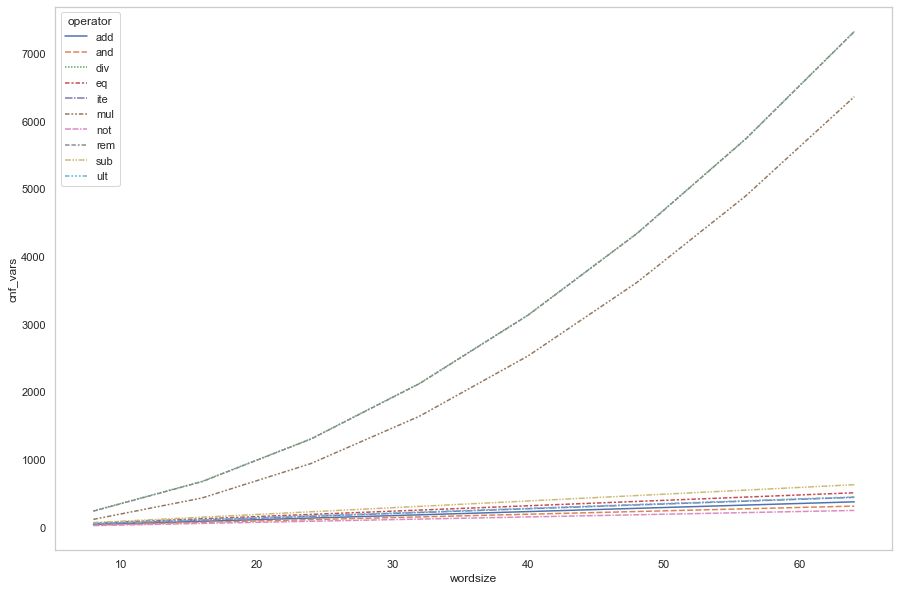

In [57]:
sns.set(rc={'figure.figsize':(15,10)})
sns.set_style("whitegrid", {'axes.grid' : False})
sns.lineplot(data=df, x="wordsize", y="cnf_vars", hue="operator", style="operator")

<AxesSubplot:xlabel='wordsize', ylabel='clauses'>

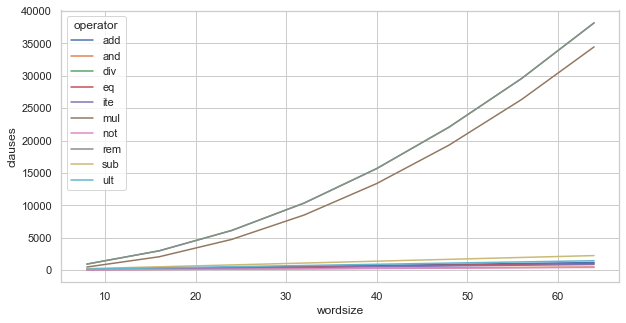

In [33]:
sns.set(rc={'figure.figsize':(15,10)})
sns.set_style("whitegrid", {'axes.grid' : False})
sns.lineplot(data=df, x="wordsize", y="clauses", hue="operator", style="operator")

<AxesSubplot:xlabel='wordsize', ylabel='clauses_per_var'>

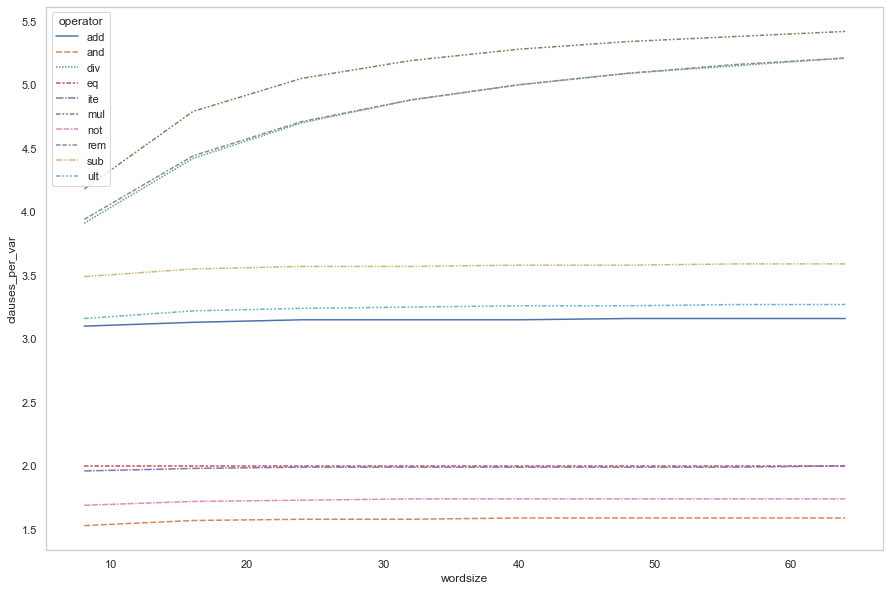

In [56]:
sns.set(rc={'figure.figsize':(15,10)})
sns.set_style("whitegrid", {'axes.grid' : False})
sns.lineplot(data=df, x="wordsize", y="clauses_per_var", hue="operator", style="operator")

## Regarding the QUBOs

<AxesSubplot:xlabel='wordsize', ylabel='qubo_vars'>

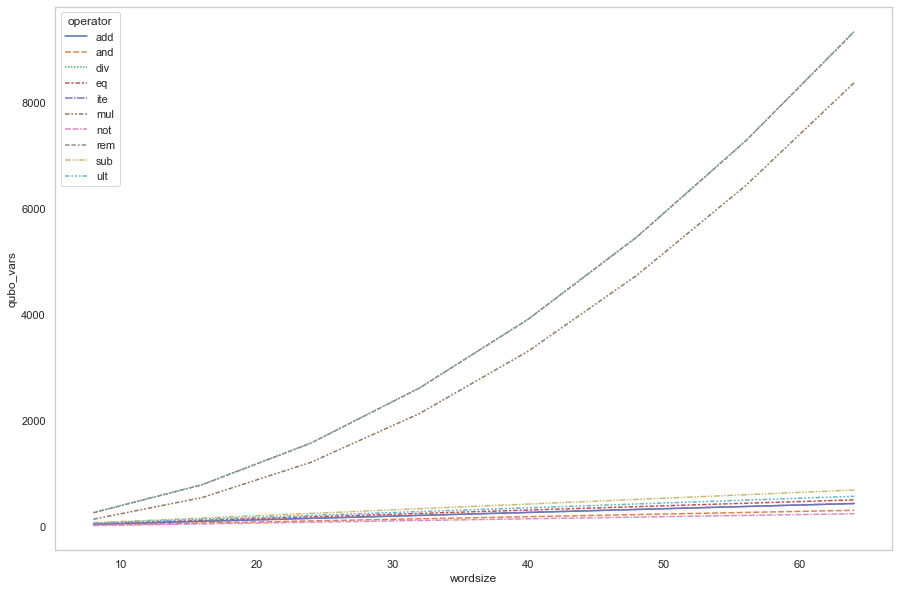

In [53]:
sns.set(rc={'figure.figsize':(15,10)})
sns.set_style("whitegrid", {'axes.grid' : False})
sns.lineplot(data=df, x="wordsize", y="qubo_vars", hue="operator",style="operator")

<AxesSubplot:xlabel='wordsize', ylabel='avg_conn'>

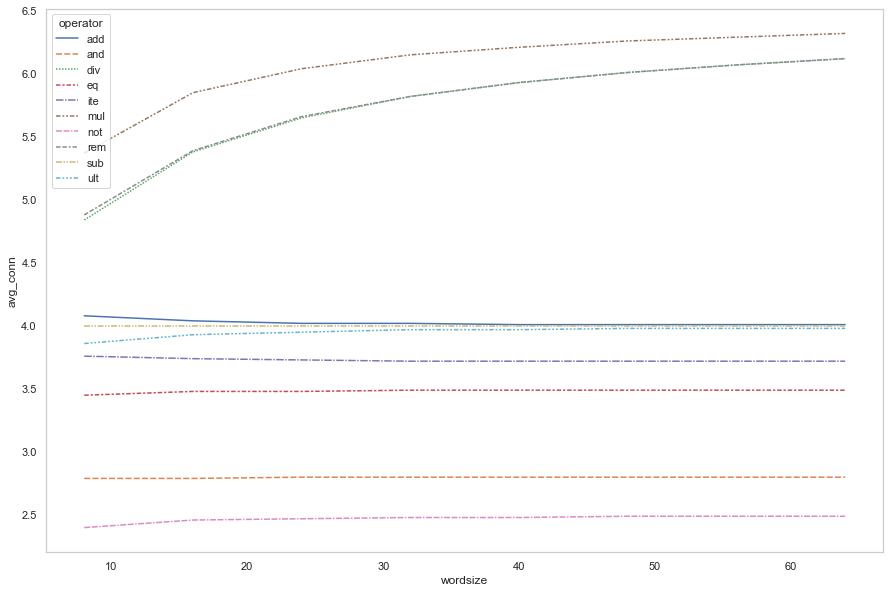

In [51]:
sns.set(rc={'figure.figsize':(15,10)})
sns.set_style("whitegrid", {'axes.grid' : False})
sns.lineplot(data=df, x="wordsize", y="avg_conn", hue="operator",style="operator")

<AxesSubplot:xlabel='wordsize', ylabel='variance_conn'>

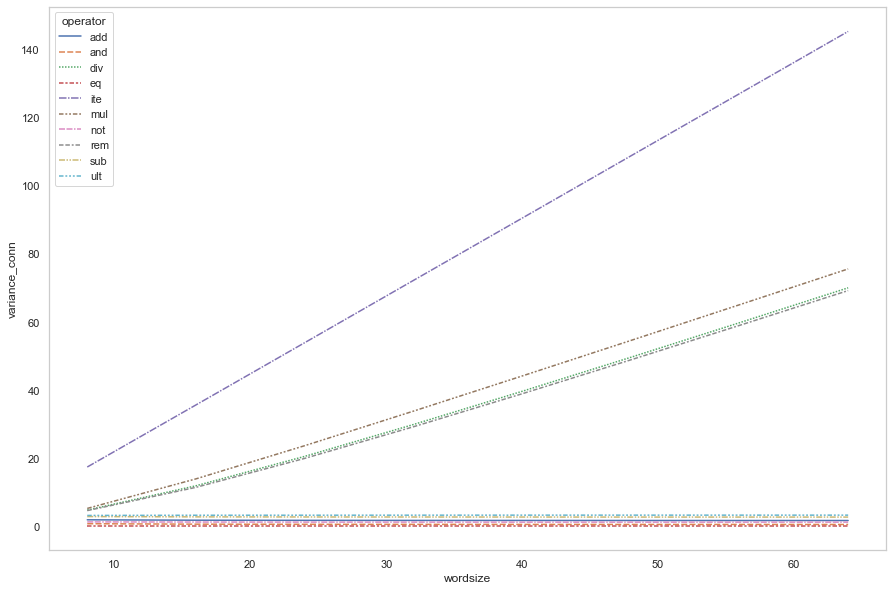

In [54]:
sns.set(rc={'figure.figsize':(15,10)})
sns.set_style("whitegrid", {'axes.grid' : False})
sns.lineplot(data=df, x="wordsize", y="variance_conn", hue="operator", style="operator")

<AxesSubplot:xlabel='wordsize', ylabel='max_conn'>

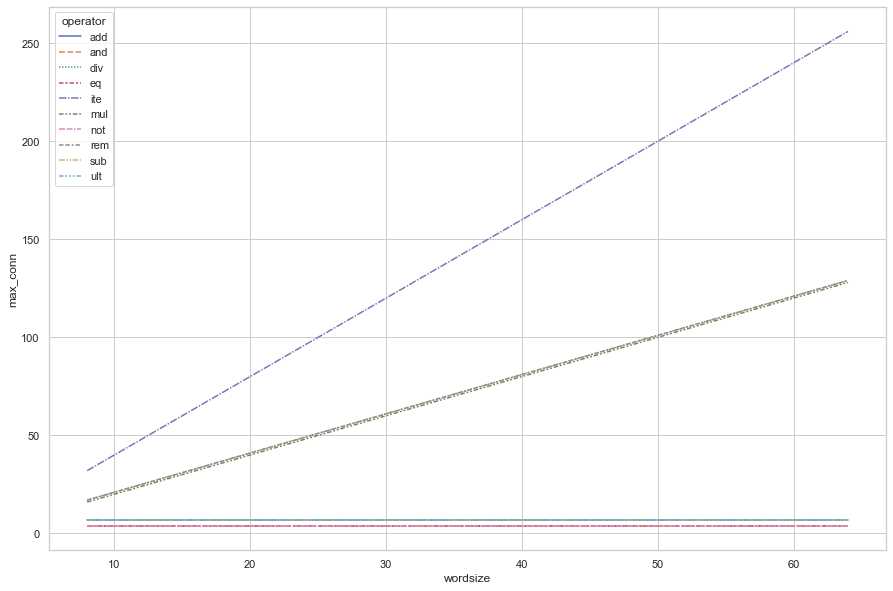

In [195]:
sns.set(rc={'figure.figsize':(15,10)})
sns.set_style("whitegrid", {'axes.grid' : True})
sns.lineplot(data=df, x="wordsize", y="max_conn", hue="operator", style="operator")

In [58]:
df.to_csv('wordsizes_vs_problem.csv')

# Plotting Similar Graphs Together

In [99]:
def build_graph1():
    operators = []
    v_wordsizes = []
    attributes = []
    values = []
    for operator, wordsize, curr_cnf_var, curr_clauses, curr_qubo_vars in zip(operator_name, wordsizes, cnf_vars, cnf_clauses, qubo_vars):
        # append cnf_vars
        operators.append(operator)
        v_wordsizes.append(wordsize)
        values.append(curr_cnf_var)
        attributes.append('cnf_vars')
        
        # append clauses
        operators.append(operator)
        v_wordsizes.append(wordsize)
        values.append(curr_clauses)
        attributes.append('clauses')
        
        
        # append qubo vars
        operators.append(operator)
        v_wordsizes.append(wordsize)
        values.append(curr_qubo_vars)
        attributes.append('qubo_vars')
    return pd.DataFrame({
        'operator': operators,
        'wordsize': v_wordsizes,
        'attribute': attributes,
        'value': values
    })
        
    

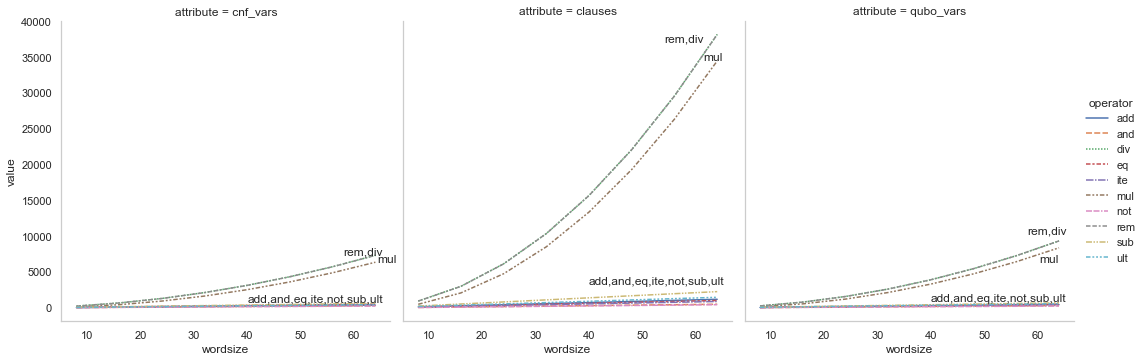

In [167]:
sns.set(rc={'figure.figsize':(15,10)})
sns.set_style("whitegrid", {'axes.grid' : False})
graph1_df = build_graph1()
a = sns.relplot(
    data=graph1_df, x="wordsize", y="value",
    col="attribute", hue="operator", style="operator", legend='full',
    kind="line"
)

ax = a.axes[0,0]
is_bottom_set = False
for idx,row in graph1_df.iterrows():
    if row.attribute == 'cnf_vars' and row.wordsize == 64:
        if row.operator == 'rem':
            y = row[3]
            text = row[0]
            ax.text(58,y,"rem,div", horizontalalignment='left')
        elif row.operator == 'mul':
            y = row[3]
            text = row[0]
            ax.text(68,y,"mul", horizontalalignment='right')
        elif row.operator != 'div' and not is_bottom_set:
            is_bottom_set = True
            y = row[3]
            text = row[0]
            text = "add,and,eq,ite,not,sub,ult"
            ax.text(40,y+400,text)
            
ax = a.axes[0,1]
is_bottom_set = False
for idx,row in graph1_df.iterrows():
    if row.attribute == 'clauses' and row.wordsize == 64:
        if row.operator == 'rem':
            y = row[3]
            text = row[0]
            ax.text(54,y-1000,"rem,div", horizontalalignment='left')
        elif row.operator == 'mul':
            y = row[3]
            text = row[0]
            ax.text(65,y,"mul", horizontalalignment='right')
        elif row.operator != 'div' and not is_bottom_set:
            is_bottom_set = True
            y = row[3]
            text = row[0]
            text = "add,and,eq,ite,not,sub,ult"
            ax.text(40,y+2000,text)
            
ax = a.axes[0,2]
is_bottom_set = False
for idx,row in graph1_df.iterrows():
    if row.attribute == 'qubo_vars' and row.wordsize == 64:
        if row.operator == 'rem':
            y = row[3]
            text = row[0]
            ax.text(58,y+1000,"rem,div", horizontalalignment='left')
        elif row.operator == 'mul':
            y = row[3]
            text = row[0]
            ax.text(64,y-2000,"mul", horizontalalignment='right')
        elif row.operator != 'div' and not is_bottom_set:
            is_bottom_set = True
            y = row[3]
            text = row[0]
            text = "add,and,eq,ite,not,sub,ult"
            ax.text(40,y+400,text)

In [124]:
def build_graph2():
    operators = []
    v_wordsizes = []
    attributes = []
    values = []
    for operator, wordsize, curr_avg_conn, curr_clauses_per_var in zip(operator_name, wordsizes, avg_conns, clauses_to_var):
        # append avg qubo connectivities 
        operators.append(operator)
        v_wordsizes.append(wordsize)
        values.append(curr_avg_conn)
        attributes.append('avg_conn')
        
        # append clauses per variable relationship
        operators.append(operator)
        v_wordsizes.append(wordsize)
        values.append(curr_clauses_per_var)
        attributes.append('clauses_per_var')
        
    return pd.DataFrame({
        'operator': operators,
        'wordsize': v_wordsizes,
        'attribute': attributes,
        'value': values
    })
        
    

In [154]:
df.operator.unique()

array(['add', 'and', 'div', 'eq', 'ite', 'mul', 'not', 'rem', 'sub',
       'ult'], dtype=object)

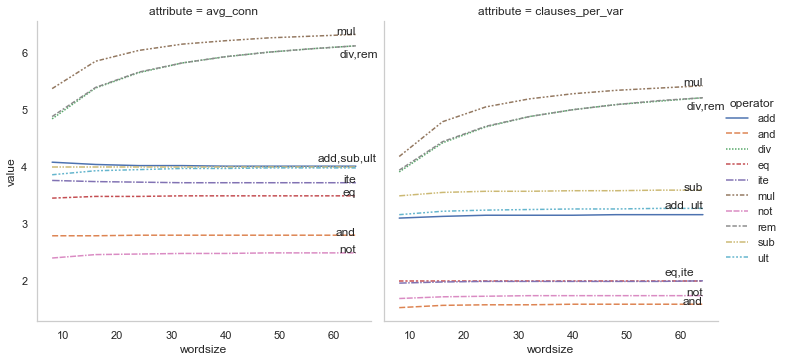

In [193]:
graph2_df = build_graph2()
a = sns.relplot(
    data=build_graph2(), x="wordsize", y="value",
    col="attribute", hue="operator", style="operator",
    kind="line"
)

ax = a.axes[0,0]
is_bottom_set = False
for idx,row in graph2_df.iterrows():
    if row.attribute == 'avg_conn' and row.wordsize == 64:
        if row.operator == 'rem' :
            x = row.wordsize
            y = row.value
            text = row[0]
            ax.text(x-3,y-0.2,"div,rem", horizontalalignment='left')
        elif row.operator in ['mul', 'eq', 'ite', 'not', 'and']:
            y = row.value
            text = row[0]
            ax.text(row.wordsize,y,row.operator, horizontalalignment='right')
        elif row.operator != 'div' and not is_bottom_set:
            is_bottom_set = True
            y = row.value
            text = "add,sub,ult"
            ax.text(row.wordsize-7,y+0.1,text)
            
ax = a.axes[0,1]
is_bottom_set = False
for idx,row in graph2_df.iterrows():
    if row.attribute == 'clauses_per_var' and row.wordsize == 64:
        if row.operator == 'rem':
            x = row.wordsize
            y = row.value
            text = row[0]
            ax.text(x-3,y-0.2,"div,rem", horizontalalignment='left')
        if row.operator in ['mul', 'sub', 'not', 'and', 'ult']:
            y = row.value
            text = row[0]
            ax.text(row.wordsize,y,row.operator, horizontalalignment='right')
        elif row.operator in ['eq', 'ite'] and not is_bottom_set:
            is_bottom_set = True
            y = row.value
            text = "eq,ite"
            ax.text(row.wordsize-7,y+0.1,text)
        elif row.operator == 'add' :
            y = row.value
            text = "add"
            ax.text(row.wordsize-7,y+0.1,text)

In [ ]:
df = pd.DataFrame({
    'operator': operator_name,
    'wordsize': wordsizes,
    'cnf_vars': cnf_vars,
    'clauses': cnf_clauses,
    'clauses_per_var': clauses_to_var,
    'qubo_vars': qubo_vars,
    'avg_conn': avg_conns,
    'variance_conn': variance_conns,
    'max_conn': max_conns
})
df

In [27]:
def build_graph3():
    operators = []
    v_wordsizes = []
    attributes = []
    values = []
    for operator, wordsize, curr_variance_conn, curr_max_conn in zip(operator_name, wordsizes, variance_conns, max_conns):
        # append avg qubo connectivities 
        operators.append(operator)
        v_wordsizes.append(wordsize)
        values.append(curr_variance_conn)
        attributes.append('variance_chain_length')
        
        # append clauses per variable relationship
        operators.append(operator)
        v_wordsizes.append(wordsize)
        values.append(curr_max_conn)
        attributes.append('max_chain_length')
        
    return pd.DataFrame({
        'operator': operators,
        'wordsize': v_wordsizes,
        'attribute': attributes,
        'value': values
    })
        
    

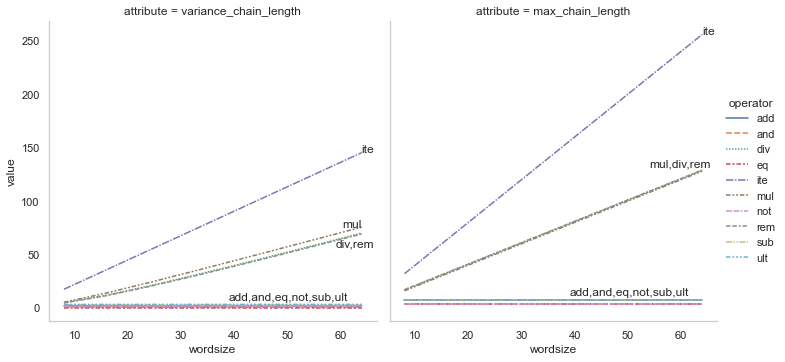

In [181]:
graph3_df = build_graph3()
a = sns.relplot(
    data=graph3_df, x="wordsize", y="value",
    col="attribute", hue="operator", style="operator",
    kind="line"
)
ax = a.axes[0,0]
is_bottom_set = False
for idx,row in graph3_df.iterrows():
    if row.attribute == 'variance_chain_length' and row.wordsize == 64:
        if row.operator == 'rem' :
            x = row.wordsize
            y = row.value
            text = row[0]
            ax.text(x-5,y-12,"div,rem", horizontalalignment='left')
        elif row.operator == 'mul':
            y = row.value
            text = row[0]
            ax.text(row.wordsize,y,"mul", horizontalalignment='right')
        elif row.operator == 'ite':
            y = row.value
            text = row[0]
            ax.text(row.wordsize,y,row.operator)
        elif row.operator != 'div' and not is_bottom_set:
            is_bottom_set = True
            y = row.value
            text = row[0]
            text = "add,and,eq,not,sub,ult"
            ax.text(row.wordsize-25,y+5,text)
            
ax = a.axes[0,1]
is_bottom_set = False
for idx,row in graph3_df.iterrows():
    if row.attribute == 'max_chain_length' and row.wordsize == 64:
        if row.operator == 'rem' :
            x = row.wordsize
            y = row.value
            text = row[0]
            ax.text(x-10,y+3,"mul,div,rem", horizontalalignment='left')
        elif row.operator == 'mul':
            pass
        elif row.operator == 'ite':
            y = row.value
            text = row[0]
            ax.text(row.wordsize,y,row.operator)
        elif row.operator != 'div' and not is_bottom_set:
            is_bottom_set = True
            y = row.value
            text = row[0]
            text = "add,and,eq,not,sub,ult"
            ax.text(row.wordsize-25,y+5,text)